<h1>2. &nbsp;Emprego das bibliotecas SymPy e SciPy</h1>

<h2>2.1 &nbsp; Solução analítica </h2>

&nbsp; O modelo do resfriamento de Newton é dado por:

$$\frac{dT}{dt}=-κ \: ( \: T \:- \: T_{a} \: )$$

&nbsp; Substituindo as constantes $T_{a}=20$ e $κ=0.1$ no modelo de resfriamento, temos o seguinte problema de valor inicial:

$$\begin{cases} \frac{dT}{dt}=-0.1 \: ( \: T \:- 20 \: )  \\ T(0)= 80 \end{cases}$$

&nbsp; A equação diferencial é separável, então pode ser escrita como:

$$ \frac{dT}{T-20} = -0.1 \ dt$$

integrando a equação, temos,

$$ ln|T-20| + C_{1}= -0.1t + C_{2}$$

isolando $T$, obtemos a solução geral:

$$ T(t)= Ce^{-0.1t} + 20 $$

&nbsp; Determinando $C$ a partir do valor inicial:

$$ T(0) = C + 20 \Rightarrow C+20=80 \Rightarrow C=60$$

&nbsp; Portanto, a solução do problema de valor inicial é:

$$ T(t) = 60e^{-0.1t}+20 $$

<h2>2.2 &nbsp; Solução através do SymPy</h2>


In [1]:
#Importando a biblioteca sympy
import sympy as sp

#Declarando função
T = sp.Function("T")

#Declarando variável
t = sp.Symbol("t")

In [2]:
#Construindo a EDO
eq_dif = sp.Eq(T(t).diff(t),-0.1*(T(t)-20))
eq_dif

Eq(Derivative(T(t), t), 2.0 - 0.1*T(t))

<h3> sympy.dsolve()</h3>

In [3]:
#Obtendo solução particular
sg = sp.dsolve(eq_dif,ics={T(0):80})
sg

Eq(T(t), 20.0 + 60.0*exp(-0.1*t))

<h2>2.3 &nbsp; Solução através do SciPy</h2>

&nbsp; Importando as bibliotecaas Numpy e SciPy

In [4]:
import numpy as np
import scipy.integrate as sciInt

&nbsp; Carregando o diretório <i><b>python/</b></i> que contém as funções escritas ao longo dos tópicos:

In [5]:
import sys
sys.path.insert(0,'../python')

&nbsp; Escrevendo arquivo contendo a função <b><i>modelo(&lt;temperatura&gt;,&lt;tempo&gt;)</i></b> contendo o modelo matemático do fenômeno

In [6]:
%%writefile ../python/modelo.py
#Definindo o modelo de resfriamento
def modelo(t,T):
    return -0.1*(T-20)

Overwriting ../python/modelo.py


&nbsp; Criando o vetor tempo:

In [7]:
t = np.arange(0,60,0.1)

&nbsp; Importando o <i><b>modelo</b></i>:

In [8]:
from modelo import modelo

<h3> scipy.integrate.odeint()</h3>
&nbsp; Método: LSODA

In [9]:
%%timeit
sol1 = sciInt.odeint(modelo, y0=80, t=t, tfirst=True)
print('s')

CPU times: total: 15.6 ms
Wall time: 2 ms


<h3> scipy.integrate.solve_ivp()</h3>
&nbsp; Método: RK45 (Padrão)

In [10]:
%%time
sol2 = sciInt.solve_ivp(modelo, t_span=(0,max(t)), y0=[80], t_eval=t)

CPU times: total: 0 ns
Wall time: 6 ms


<h2>2.4 &nbsp; Esboço do gráfico através do Matplotlib</h2>
&nbsp; Esboço das soluções pelo SymPy e SciPy (LSODA e RK45) para uma hora.

In [11]:
#importando a biblioteca Matplotlib
import matplotlib.pyplot as plt

#Criando intervalo de tempo
t = np.arange(0,60,0.1) 

<h3> Sympy</h3>

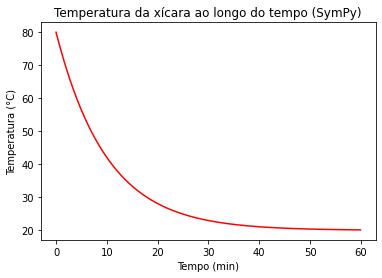

In [12]:
#Solução pelo SymPy
plt.plot(t,20+60*np.exp(-0.1*t),"r") 

#Exibindo figura
plt.title("Temperatura da xícara ao longo do tempo (SymPy)")
plt.xlabel("Tempo (min)")
plt.ylabel("Temperatura (°C)")
plt.show()

<h3>LSODA</h3>

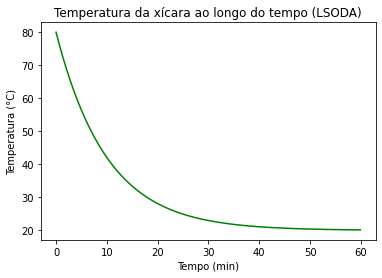

In [13]:
#Solução pelo LSODA
plt.plot(t,sol1,"g")

#Exibindo figura
plt.title("Temperatura da xícara ao longo do tempo (LSODA)")
plt.xlabel("Tempo (min)")
plt.ylabel("Temperatura (°C)")
plt.show()

<h3>RK45</h3>

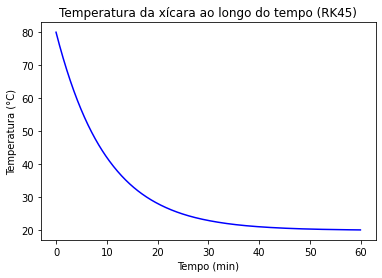

In [14]:
#solução pelo SciPy (RK45)
plt.plot(t,sol2.y[0],"b")

#Exibindo figura
plt.title("Temperatura da xícara ao longo do tempo (RK45)")
plt.xlabel("Tempo (min)")
plt.ylabel("Temperatura (°C)")
plt.show()